# PMDS FoML 2022 Midterm Quiz

Good morning! In this quiz, you'll be asked to solve a binary classification problem using
the simple QP solution for the SVM. However, the data are not exactly linearly separable, so
we will need to find a transformation that makes them so.

There are 5 questions. For each question, fill in your answer (code) and make sure it runs.

Consider the dataset below. $X$ contains 2D samples from two classes (200 samples from each class),
and $y$ contains the labels for the samples (-1 and 1).

In [1]:
import numpy as np

X = np.array([[1.81817166e+00, 3.91323730e-01], [1.13384932e+01, 1.08112168e+01],
       [8.80138996e+00, 1.14540106e+01],       [8.57909895e+00, 1.08178198e+01],
       [3.21619167e+00, 5.46325563e+00],       [1.08456143e+01, 1.23382558e+01],
       [2.31730567e+00, 3.03819379e+00],       [1.56104384e+01, 1.18009492e+01],
       [6.02925832e+00, 5.50431296e+00],       [3.03725259e+00, 4.47171721e+00],
       [3.09421034e+00, 2.21462930e+00],       [1.20000331e+01, 1.06458857e+01],
       [7.25330141e+00, 7.51254832e+00],       [4.23010920e+00, 4.78347931e-01],
       [8.13090097e+00, 1.19823887e+01],       [4.26459248e+00, 3.60736636e+00],
       [1.06436920e+01, 1.06714159e+01],       [1.02960050e+01, 1.24454896e+01],
       [8.92853143e+00, 1.20504750e+01],       [7.19312161e+00, 8.34412171e+00],
       [4.63832953e+00, 5.57232207e+00],       [1.58045957e+01, 1.53499831e+01],
       [2.35484220e+00, 8.31599447e-01],       [3.29658325e+00, 6.29429810e+00],
       [1.34874168e+01, 1.39463010e+01],       [9.74398235e+00, 1.27345521e+01],
       [5.03551799e+00, 7.97632795e+00],       [9.01208368e+00, 1.00408855e+01],
       [1.27893827e+01, 1.30301467e+01],       [1.39590557e+01, 1.31355208e+01],
       [8.93330545e+00, 1.04454557e+01],       [1.13340952e+01, 1.28495788e+01],
       [6.47540118e+00, 1.12743861e+01],       [9.49312460e+00, 1.07896626e+01],
       [6.35191820e+00, 9.54926249e+00],       [1.48646018e+01, 1.28659786e+01],
       [3.32770404e+00, 4.70345164e+00],       [1.56580209e+01, 1.32307699e+01],
       [4.86571054e+00, 4.26185002e+00],       [9.69948104e+00, 8.72336789e+00],
       [8.72275377e+00, 8.82588792e+00],       [1.55867088e+01, 1.35054203e+01],
       [4.73762442e+00, 4.71758377e+00],       [1.27389144e+00, 1.98896879e-01],
       [6.28143278e+00, 1.07448914e+01],       [7.13466746e+00, 9.21416313e+00],
       [9.12411162e+00, 1.00458377e+01],       [4.78869132e+00, 8.75546668e+00],
       [1.27407857e+01, 1.25287587e+01],       [9.43360918e+00, 8.26168382e+00],
       [2.55384645e+00, 4.32437285e+00],       [7.77747868e+00, 1.11203968e+01],
       [4.62211204e+00, 5.68107110e+00],       [5.66827342e+00, 8.95549992e+00],
       [5.33105761e+00, 2.99147555e+00],       [1.36902398e+01, 1.35113859e+01],
       [3.72734136e+00, 5.42053108e+00],       [5.68531069e+00, 7.28050645e+00],
       [7.82050752e+00, 9.23642141e+00],       [7.18563029e+00, 9.89100809e+00],
       [4.20070637e+00, 1.08611612e+00],       [2.00136484e+00, 4.27728214e+00],
       [4.38150799e+00, 2.57188009e+00],       [6.99848947e+00, 9.18045596e+00],
       [9.94539187e+00, 1.17134794e+01],       [1.56494415e+01, 1.18650054e+01],
       [5.94960964e+00, 4.84095341e+00],       [6.98744595e+00, 8.04223913e+00],
       [3.19722249e+00, 2.42356433e+00],       [6.01715282e+00, 5.42264492e+00],
       [3.62333448e+00, 6.66879786e+00],       [5.12425353e+00, 9.22508921e+00],
       [9.94564114e+00, 1.22055479e+01],       [3.20221748e+00, 4.53249247e+00],
       [6.82691509e+00, 6.80706189e+00],       [3.75009371e+00, 4.20989046e+00],
       [7.58873412e+00, 1.01808522e+01],       [8.30303738e+00, 9.83653660e+00],
       [2.60499245e+00, 8.13406684e+00],       [5.09798341e+00, 5.38168263e+00],
       [1.18994923e+01, 1.16987798e+01],       [5.03685248e+00, 6.14506444e+00],
       [1.42074874e+01, 1.22483869e+01],       [3.06746205e+00, 5.28977083e+00],
       [4.59621071e+00, 2.16608625e-01],       [6.11331730e+00, 9.01475632e+00],
       [5.57294918e+00, 5.74867943e+00],       [3.24174942e+00, 5.93045474e+00],
       [4.45006192e+00, 7.22207850e-02],       [1.17305697e+01, 1.34983485e+01],
       [5.33528660e+00, 5.36874588e+00],       [1.19741610e+01, 1.06291747e+01],
       [6.42990683e+00, 1.15441420e+01],       [2.53574818e+00, 8.96943439e-01],
       [8.85675634e+00, 1.21842354e+01],       [5.46131169e+00, 8.97519202e+00],
       [7.31867006e+00, 9.30632905e+00],       [7.39524883e+00, 8.17395144e+00],
       [1.50920778e+01, 1.24524131e+01],       [9.79935401e+00, 1.33874723e+01],
       [1.25468497e+01, 1.42400715e+01],       [1.19034226e+01, 1.10203529e+01],
       [1.37824971e+01, 1.21405297e+01],       [5.74609247e+00, 7.17838678e+00],
       [1.57517472e+01, 1.27647145e+01],       [4.67459128e+00, 4.88128367e+00],
       [3.59159910e+00, 2.31749682e+00],       [4.67100819e+00, 5.47048860e+00],
       [2.39958677e+00, 2.48787509e-01],       [9.40129246e+00, 1.07590231e+01],
       [1.59281221e+01, 1.22316792e+01],       [1.07336575e+01, 1.15580109e+01],
       [7.57553416e+00, 9.49694027e+00],       [1.57358278e+01, 1.43375283e+01],
       [4.28614874e+00, 5.88110053e+00],       [3.12633028e+00, 3.54027454e-01],
       [4.22683825e+00, 4.49302525e+00],       [1.17090464e+01, 1.23858329e+01],
       [1.41475632e+01, 1.19406295e+01],       [1.62262853e+00, 2.49596100e+00],
       [1.21825158e+01, 1.08845374e+01],       [1.40440619e+01, 1.10145549e+01],
       [2.27803698e+00, 5.15473156e+00],       [4.78655666e+00, 8.60317112e+00],
       [5.27298771e+00, 6.80637105e+00],       [5.24761986e+00, 9.07671072e+00],
       [8.65585434e+00, 9.83771065e+00],       [4.17874731e+00, 8.26010025e+00],
       [1.43290370e+01, 1.40161433e+01],       [9.01679571e+00, 1.06205616e+01],
       [1.31881510e+01, 1.38638649e+01],       [8.06618051e+00, 1.21999444e+01],
       [3.28603382e+00, 1.20861455e+00],       [2.24648916e+00, 1.28145794e+00],
       [7.58902574e+00, 1.09599930e+01],       [1.13006588e+01, 1.23231194e+01],
       [2.62877127e+00, 1.09445441e+00],       [7.43928644e+00, 8.56994453e+00],
       [6.76653149e+00, 8.00292386e+00],       [3.41291707e+00, 1.15849564e+00],
       [6.64632762e+00, 9.64367813e+00],       [3.96112010e+00, 2.25178189e+00],
       [5.01621665e+00, 6.96690889e+00],       [3.66174564e+00, 6.44114314e+00],
       [5.95199476e+00, 6.49913768e+00],       [5.67218092e+00, 4.94277646e+00],
       [3.06829533e+00, 2.94344334e+00],       [9.12587285e+00, 1.13786439e+01],
       [9.17694368e+00, 1.07579232e+01],       [5.02776877e+00, 9.90008408e+00],
       [4.68165953e+00, 1.76980887e+00],       [1.04918918e+01, 1.07446121e+01],
       [4.71479238e+00, 4.31608675e+00],       [2.38008383e+00, 1.15932195e+00],
       [1.16222268e+01, 1.34435224e+01],       [8.79172560e+00, 1.10266561e+01],
       [3.97548258e+00, 4.98251045e+00],       [9.30734692e+00, 1.27077333e+01],
       [4.59466077e+00, 5.52953414e-01],       [1.01903032e+01, 1.05331976e+01],
       [6.86336250e+00, 1.07735131e+01],       [3.98564316e+00, 6.42751336e+00],
       [8.52652435e+00, 1.08567660e+01],       [1.40928845e+00, 8.52459795e-01],
       [6.32429939e+00, 8.51385891e+00],       [3.84528236e+00, 3.42087767e-02],
       [3.22703692e+00, 2.09983143e+00],       [8.93923663e+00, 1.22694272e+01],
       [3.56358646e+00, 4.32469540e+00],       [9.92990925e+00, 1.03692040e+01],
       [5.46631894e+00, 6.99613859e+00],       [3.87749737e+00, 4.71536573e+00],
       [3.85263152e+00, 5.49902555e+00],       [1.50798312e+01, 1.28092997e+01],
       [5.27377507e+00, 3.37990914e+00],       [6.21205653e+00, 8.38259827e+00],
       [8.83496454e+00, 1.24352565e+01],       [1.43942064e+01, 1.27822972e+01],
       [9.36468738e+00, 1.29440550e+01],       [6.54131105e+00, 9.94912449e+00],
       [2.42283042e+00, 1.89060725e-01],       [1.16625926e+01, 1.23212454e+01],
       [7.42960862e+00, 8.87766431e+00],       [3.33452328e+00, 7.15316647e+00],
       [2.99664900e+00, 9.51244712e-01],       [4.05434211e+00, 7.49986055e+00],
       [3.20517990e+00, 1.30699247e+00],       [4.76105074e+00, 5.64103487e+00],
       [1.19162096e+01, 1.15317024e+01],       [1.03672260e+01, 9.73063442e+00],
       [1.25905943e+01, 1.17241627e+01],       [8.67364273e+00, 1.18592167e+01],
       [1.25552317e+01, 1.40406133e+01],       [4.29334463e+00, 5.33962467e+00],
       [1.00796891e+01, 1.05806474e+01],       [7.03553407e+00, 8.38910074e+00],
       [5.36292893e+00, 9.70234222e+00],       [2.62232957e+00, 6.32701665e-02],
       [2.87078422e+00, 7.53017043e+00],       [1.07646714e+01, 1.15805571e+01],
       [7.63440781e+00, 3.76744110e+00],       [1.37364088e+01, 5.21762415e+00],
       [1.47171597e+01, 2.12886899e+00],       [1.35457189e+01, 1.53726673e+00],
       [1.13193914e+01, 7.00492246e+00],       [1.25331732e+01, 4.02901614e+00],
       [1.11250773e+01, 2.42856452e+00],       [1.49768174e+01, 9.57762472e-01],
       [1.25660698e+01, 4.30746287e-01],       [1.52576055e+01, 7.77067722e+00],
       [1.03936681e+01, 6.07953877e-01],       [1.41051423e+01, 6.37050591e+00],
       [1.57375955e+01, 6.86211301e-01],       [1.27174263e+01, 2.02366685e+00],
       [1.17169279e+01, 2.09554904e+00],       [1.06683584e+01, 8.88043087e-01],
       [1.55284012e+01, 2.89209229e-01],       [1.33712114e+01, 1.59708541e+00],
       [1.55558306e+01, 5.50422274e+00],       [1.55612208e+01, 2.95919360e+00],
       [1.29065117e+01, 3.96320947e+00],       [1.29939660e+01, 2.67196626e+00],
       [1.06268408e+01, 1.97047046e+00],       [1.28489543e+01, 3.09107431e+00],
       [1.37337505e+01, 5.51601311e+00],       [1.51922934e+01, 2.35595378e+00],
       [1.46915720e+01, 1.55027568e+00],       [1.47142221e+01, 2.53873135e+00],
       [1.37108857e+01, 7.02106197e+00],       [1.30978207e+01, 1.65727637e+00],
       [9.80622851e+00, 3.33318048e+00],       [1.36646349e+01, 2.45590631e+00],
       [1.57220883e+01, 5.64208001e+00],       [1.20089430e+01, 1.89907150e+00],
       [1.22094142e+01, 9.05522731e-01],       [1.14856089e+01, 4.25424006e-01],
       [1.02498832e+01, 1.12966275e+00],       [1.53781135e+01, 4.90394132e+00],
       [9.21648031e+00, 2.97355788e+00],       [1.28063316e+01, 6.59437754e+00],
       [1.40448541e+01, 2.02511392e+00],       [1.06813496e+01, 5.62091600e+00],
       [1.28913026e+01, 3.44263991e+00],       [1.57536681e+01, 4.16624995e+00],
       [1.11121794e+01, 3.70730144e+00],       [1.52384621e+01, 1.69636795e+00],
       [1.33845998e+01, 4.97265591e+00],       [1.00874403e+01, 3.23248132e+00],
       [1.19278929e+01, 8.99968670e-01],       [1.43465427e+01, 1.93586101e+00],
       [1.36909289e+01, 3.34586442e-01],       [1.16079616e+01, 4.75624251e+00],
       [1.36444123e+01, 4.45622191e+00],       [1.09702200e+01, 2.47182875e+00],
       [1.13188935e+01, 6.22222940e+00],       [1.33037620e+01, 4.64513028e+00],
       [1.43277073e+01, 4.12246981e+00],       [1.21052269e+01, 3.28900495e+00],
       [1.21799587e+01, 4.98665541e-01],       [1.48311144e+01, 4.34432290e+00],
       [1.31610982e+01, 1.98066573e+00],       [1.30744026e+01, 4.27821646e+00],
       [1.17012870e+01, 6.47022375e+00],       [1.20400018e+01, 1.84360323e+00],
       [1.55523726e+01, 3.27395290e+00],       [1.55461153e+01, 7.84722614e+00],
       [1.23638895e+01, 4.65285878e+00],       [1.02994498e+01, 1.33280050e+00],
       [1.25712084e+01, 1.78285007e+00],       [1.09724195e+01, 1.44116970e+00],
       [1.22964184e+01, 7.51274302e-01],       [1.55487854e+01, 2.39984468e+00],
       [9.88184512e+00, 5.90496520e+00],       [1.32597582e+01, 1.67451144e+00],
       [1.49663451e+01, 3.90889028e+00],       [1.34936268e+01, 2.77508944e+00],
       [1.47602671e+01, 5.24517561e+00],       [1.19556227e+01, 3.87610327e-01],
       [1.52665750e+01, 5.03291854e+00],       [1.58877389e+01, 2.88045577e+00],
       [1.44669731e+01, 1.74477268e+00],       [1.21508883e+01, 1.90751731e+00],
       [1.23633536e+01, 4.17142845e+00],       [1.02262577e+01, 3.87167548e-01],
       [1.09419081e+01, 3.04558576e+00],       [1.23941460e+01, 9.98830693e-01],
       [9.27250235e+00, 7.95244940e-01],       [1.44039941e+01, 3.14353124e+00],
       [1.35108431e+01, 6.90487351e+00],       [1.19009466e+01, 3.66146107e+00],
       [1.12199926e+01, 6.49121978e+00],       [1.49276361e+01, 4.32774421e+00],
       [1.21067791e+01, 1.23550873e+00],       [1.31342996e+01, 1.21367289e+00],
       [1.03845842e+01, 3.18353465e-01],       [1.09667391e+01, 2.36175302e+00],
       [1.53687984e+01, 3.39674465e-01],       [1.45017994e+01, 4.33026259e+00],
       [1.39763706e+01, 4.02400067e+00],       [1.34793390e+01, 6.19767711e+00],
       [1.37858446e+01, 7.59925339e+00],       [1.41610623e+01, 6.11656278e+00],
       [1.38020373e+01, 1.39446302e+00],       [1.26687162e+01, 5.29510838e+00],
       [1.17350979e+01, 3.82661847e+00],       [1.32621542e+01, 5.70665576e-01],
       [1.54429600e+01, 5.05747075e+00],       [1.40348059e+01, 5.14343697e+00],
       [1.54397775e+01, 5.03997239e+00],       [1.42765513e+01, 2.69229263e+00],
       [1.00277100e+01, 7.71708427e-01],       [1.50806197e+01, 5.74851319e+00],
       [1.23767353e+01, 3.31986761e+00],       [1.28366197e+01, 1.04910145e+00],
       [1.06388184e+01, 4.69494574e+00],       [1.13892247e+01, 4.35043264e+00],
       [1.23965363e+01, 4.32065230e+00],       [1.26077645e+01, 4.41278419e-01],
       [8.38177297e+00, 2.89534512e+00],       [1.22168806e+01, 1.66532395e+00],
       [1.43243342e+01, 8.20643897e+00],       [9.56958755e+00, 1.05991321e+00],
       [8.96544398e+00, 2.54294865e+00],       [9.89035427e+00, 4.15612773e+00],
       [1.11278334e+01, 3.28905233e+00],       [1.39260858e+01, 6.87999716e+00],
       [9.97614411e+00, 3.22361772e+00],       [1.59993429e+01, 1.80636021e-03],
       [1.20206742e+01, 1.10682834e-02],       [1.36654851e+01, 1.77051073e+00],
       [1.24834708e+01, 1.39462590e+00],       [1.09649864e+01, 1.83825403e-01],
       [1.06932227e+01, 3.48752818e+00],       [1.45360459e+01, 4.36431834e+00],
       [1.57352308e+01, 5.47645459e+00],       [1.28024628e+01, 1.14583492e+00],
       [1.30669271e+01, 2.71462679e+00],       [1.53240322e+01, 2.25505027e+00],
       [1.56957723e+01, 3.64203487e+00],       [9.90364401e+00, 2.69293946e+00],
       [9.08522689e+00, 2.63315399e+00],       [9.11646916e+00, 2.06597163e-01],
       [1.02180128e+01, 4.40359653e+00],       [1.29790057e+01, 8.02534018e+00],
       [1.49599767e+01, 4.47425710e+00],       [1.56730537e+01, 6.83645200e-01],
       [1.25279436e+01, 3.18378526e+00],       [1.51356449e+01, 2.37280653e+00],
       [1.32349718e+01, 3.13004115e+00],       [1.47790533e+01, 8.27288736e+00],
       [1.46584446e+01, 5.31056568e+00],       [1.14580623e+01, 5.15435510e+00],
       [1.35899856e+01, 7.47918708e+00],       [1.29044903e+01, 2.12197976e+00],
       [1.33499196e+01, 3.92372091e+00],       [1.17636592e+01, 6.70766535e+00],
       [1.58497881e+01, 3.38875081e+00],       [1.53244858e+01, 3.50343692e+00],
       [9.06680238e+00, 2.01266127e+00],       [1.11434911e+01, 3.51468388e+00],
       [1.56373000e+01, 2.65752279e+00],       [1.18029128e+01, 5.34886541e+00],
       [1.52387589e+01, 2.63623395e+00],       [1.36117044e+01, 5.06755253e+00],
       [1.34579018e+01, 3.41707085e+00],       [1.41769517e+01, 3.18960928e+00],
       [1.04062540e+01, 3.12044004e+00],       [9.18694418e+00, 1.52330053e+00],
       [1.29011709e+01, 1.08451441e+00],       [1.40664524e+01, 3.38604536e+00],
       [1.30961711e+01, 4.90749392e+00],       [1.47811591e+01, 2.01981901e+00],
       [1.52888445e+01, 3.52566163e+00],       [9.33787572e+00, 2.20154770e-01],
       [1.24178659e+01, 3.08804564e+00],       [1.38515320e+01, 3.07014849e-01],
       [1.48438915e+01, 5.58884082e+00],       [1.44758550e+01, 5.51694811e-01],
       [1.55085483e+01, 3.52886310e+00],       [1.33434507e+01, 8.55109566e-02],
       [1.47741913e+01, 2.30459875e+00],       [1.21639153e+01, 4.49991518e+00],
       [1.18913396e+01, 3.84960559e-01],       [1.34549241e+01, 2.45751345e+00],
       [1.53529837e+01, 1.97273402e+00],       [1.31636345e+01, 1.71889659e+00],
       [1.15288602e+01, 4.40472553e+00],       [1.47581946e+01, 7.52382265e+00],
       [1.58582335e+01, 3.86436778e-01],       [1.54973899e+01, 6.34369270e+00],
       [1.43096232e+01, 4.46191697e+00],       [1.54758453e+01, 2.07968387e+00],
       [1.22491012e+01, 2.96146068e+00],       [1.49366937e+01, 2.61559258e+00],
       [1.16417032e+01, 4.19320422e+00],       [1.11567927e+01, 3.14957407e+00],
       [1.51281711e+01, 5.09169037e+00],       [9.32163493e+00, 6.34172235e-01],
       [8.77181490e+00, 4.98328507e+00],       [1.54329704e+01, 5.42019150e+00]])

y = np.array([[-1.], [-1.],      [-1.],       [-1.],
       [-1.],       [-1.],       [-1.],       [-1.],
       [-1.],       [-1.],       [-1.],       [-1.],
       [-1.],       [-1.],       [-1.],       [-1.],
       [-1.],       [-1.],       [-1.],       [-1.],
       [-1.],       [-1.],       [-1.],       [-1.],
       [-1.],       [-1.],       [-1.],       [-1.],
       [-1.],       [-1.],       [-1.],       [-1.],
       [-1.],       [-1.],       [-1.],       [-1.],
       [-1.],       [-1.],       [-1.],       [-1.],
       [-1.],       [-1.],       [-1.],       [-1.],
       [-1.],       [-1.],       [-1.],       [-1.],
       [-1.],       [-1.],       [-1.],       [-1.],
       [-1.],       [-1.],       [-1.],       [-1.],
       [-1.],       [-1.],       [-1.],       [-1.],
       [-1.],       [-1.],       [-1.],       [-1.],
       [-1.],       [-1.],       [-1.],       [-1.],
       [-1.],       [-1.],       [-1.],       [-1.],
       [-1.],       [-1.],       [-1.],       [-1.],
       [-1.],       [-1.],       [-1.],       [-1.],
       [-1.],       [-1.],       [-1.],       [-1.],
       [-1.],       [-1.],       [-1.],       [-1.],
       [-1.],       [-1.],       [-1.],       [-1.],
       [-1.],       [-1.],       [-1.],       [-1.],
       [-1.],       [-1.],       [-1.],       [-1.],
       [-1.],       [-1.],       [-1.],       [-1.],
       [-1.],       [-1.],       [-1.],       [-1.],
       [-1.],       [-1.],       [-1.],       [-1.],
       [-1.],       [-1.],       [-1.],       [-1.],
       [-1.],       [-1.],       [-1.],       [-1.],
       [-1.],       [-1.],       [-1.],       [-1.],
       [-1.],       [-1.],       [-1.],       [-1.],
       [-1.],       [-1.],       [-1.],       [-1.],
       [-1.],       [-1.],       [-1.],       [-1.],
       [-1.],       [-1.],       [-1.],       [-1.],
       [-1.],       [-1.],       [-1.],       [-1.],
       [-1.],       [-1.],       [-1.],       [-1.],
       [-1.],       [-1.],       [-1.],       [-1.],
       [-1.],       [-1.],       [-1.],       [-1.],
       [-1.],       [-1.],       [-1.],       [-1.],
       [-1.],       [-1.],       [-1.],       [-1.],
       [-1.],       [-1.],       [-1.],       [-1.],
       [-1.],       [-1.],       [-1.],       [-1.],
       [-1.],       [-1.],       [-1.],       [-1.],
       [-1.],       [-1.],       [-1.],       [-1.],
       [-1.],       [-1.],       [-1.],       [-1.],
       [-1.],       [-1.],       [-1.],       [-1.],
       [-1.],       [-1.],       [-1.],       [-1.],
       [-1.],       [-1.],       [-1.],       [-1.],
       [-1.],       [-1.],       [-1.],       [-1.],
       [ 1.],       [ 1.],       [ 1.],       [ 1.],
       [ 1.],       [ 1.],       [ 1.],       [ 1.],
       [ 1.],       [ 1.],       [ 1.],       [ 1.],
       [ 1.],       [ 1.],       [ 1.],       [ 1.],
       [ 1.],       [ 1.],       [ 1.],       [ 1.],
       [ 1.],       [ 1.],       [ 1.],       [ 1.],
       [ 1.],       [ 1.],       [ 1.],       [ 1.],
       [ 1.],       [ 1.],       [ 1.],       [ 1.],
       [ 1.],       [ 1.],       [ 1.],       [ 1.],
       [ 1.],       [ 1.],       [ 1.],       [ 1.],
       [ 1.],       [ 1.],       [ 1.],       [ 1.],
       [ 1.],       [ 1.],       [ 1.],       [ 1.],
       [ 1.],       [ 1.],       [ 1.],       [ 1.],
       [ 1.],       [ 1.],       [ 1.],       [ 1.],
       [ 1.],       [ 1.],       [ 1.],       [ 1.],
       [ 1.],       [ 1.],       [ 1.],       [ 1.],
       [ 1.],       [ 1.],       [ 1.],       [ 1.],
       [ 1.],       [ 1.],       [ 1.],       [ 1.],
       [ 1.],       [ 1.],       [ 1.],       [ 1.],
       [ 1.],       [ 1.],       [ 1.],       [ 1.],
       [ 1.],       [ 1.],       [ 1.],       [ 1.],
       [ 1.],       [ 1.],       [ 1.],       [ 1.],
       [ 1.],       [ 1.],       [ 1.],       [ 1.],
       [ 1.],       [ 1.],       [ 1.],       [ 1.],
       [ 1.],       [ 1.],       [ 1.],       [ 1.],
       [ 1.],       [ 1.],       [ 1.],       [ 1.],
       [ 1.],       [ 1.],       [ 1.],       [ 1.],
       [ 1.],       [ 1.],       [ 1.],       [ 1.],
       [ 1.],       [ 1.],       [ 1.],       [ 1.],
       [ 1.],       [ 1.],       [ 1.],       [ 1.],
       [ 1.],       [ 1.],       [ 1.],       [ 1.],
       [ 1.],       [ 1.],       [ 1.],       [ 1.],
       [ 1.],       [ 1.],       [ 1.],       [ 1.],
       [ 1.],       [ 1.],       [ 1.],       [ 1.],
       [ 1.],       [ 1.],       [ 1.],       [ 1.],
       [ 1.],       [ 1.],       [ 1.],       [ 1.],
       [ 1.],       [ 1.],       [ 1.],       [ 1.],
       [ 1.],       [ 1.],       [ 1.],       [ 1.],
       [ 1.],       [ 1.],       [ 1.],       [ 1.],
       [ 1.],       [ 1.],       [ 1.],       [ 1.],
       [ 1.],       [ 1.],       [ 1.],       [ 1.],
       [ 1.],       [ 1.],       [ 1.],       [ 1.],
       [ 1.],       [ 1.],       [ 1.],       [ 1.],
       [ 1.],       [ 1.],       [ 1.],       [ 1.],
       [ 1.],       [ 1.],       [ 1.],       [ 1.],
       [ 1.],       [ 1.],       [ 1.],       [ 1.],
       [ 1.],       [ 1.],       [ 1.],       [ 1.],
       [ 1.],       [ 1.],       [ 1.],       [ 1.],
       [ 1.],       [ 1.],       [ 1.],       [ 1.],
       [ 1.],       [ 1.],       [ 1.],       [ 1.]])

## Question 1

In the cell below, write code to
plot the samples from the two classes in a 2D plot with different colors for each class.

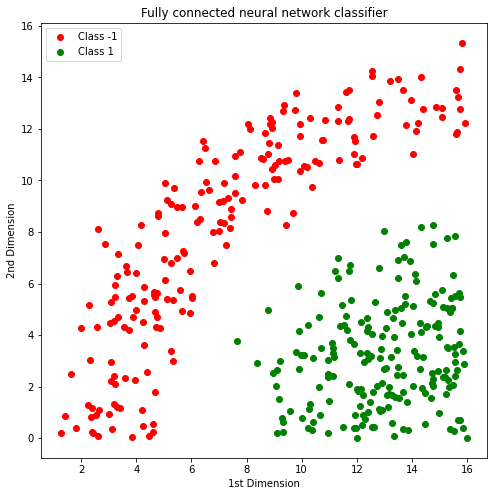

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.scatter(X[(y==-1).flat,0], X[(y==-1).flat,1], c='r', marker='o', label='Class -1')
plt.scatter(X[(y==1).flat,0], X[(y==1).flat,1], c='g', marker='o', label='Class 1')

plt.xlabel('1st Dimension')
plt.ylabel('2nd Dimension')
plt.legend()
plt.title('Fully connected neural network classifier')
plt.show()

## Question 2

In the cell below, write code to split the data into training and validation sets, with 80% for training and 20% for
validation.

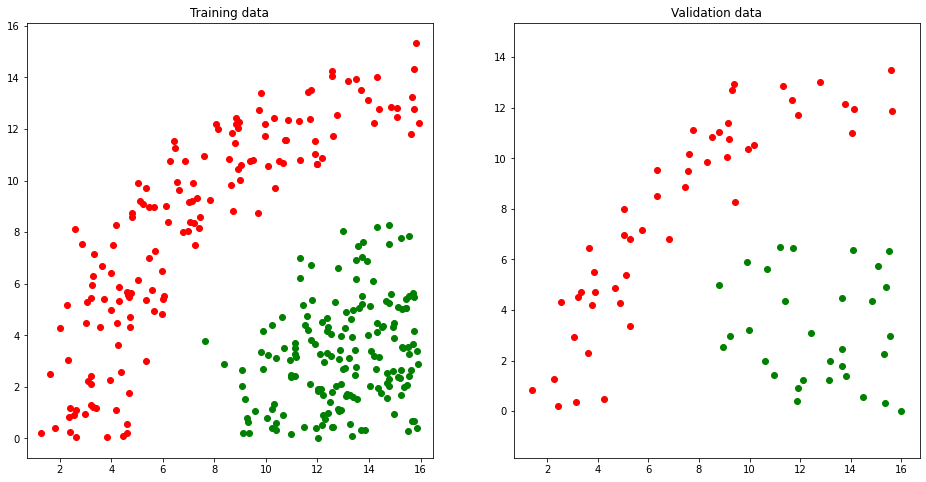

In [3]:
# Code to split into train and validation goes here


def train_val_split(X,y,test_size):
    m=X.shape[0]
    idx=np.arange(m)
    np.random.shuffle(idx)
    m_train=int ((1-test_size)*m)
    train_idx = idx [:m_train]
    val_idx = idx [m_train:]
    X_train = X [train_idx,:]
    X_val = X [val_idx,:]
    y_train = y [train_idx,:]
    y_val = y [val_idx,:]
    return X_train,X_val,y_train,y_val

X_train,X_val,y_train,y_val=train_val_split(X,y,0.2)
def plot_data(X, y, title):
    X_0 = X[(y==-1).flat]
    X_1 = X[(y==1).flat]
    plt.plot(X_0[:,0], X_0[:,1], 'ro')
    plt.plot(X_1[:,0], X_1[:,1], 'go')
    plt.title(title)
    plt.axis('equal')
    
plt.rcParams["figure.figsize"] = (16, 8)
plt.subplot(1,2, 1)
plot_data(X_train, y_train, 'Training data')
plt.subplot(1,2, 2)
plot_data(X_val, y_val, 'Validation data')

## Question 3

If we want to use the QP method for the SVM on these data, we need to transform them so that they
are linearly separable.

In the cell below, write code to transform the original features so that the two classes are linearly
separable and plot the transformed data. You should be able to verify visually that the two classes
are now linearly separable. Plot the transformed training data and transformed validation data separately.

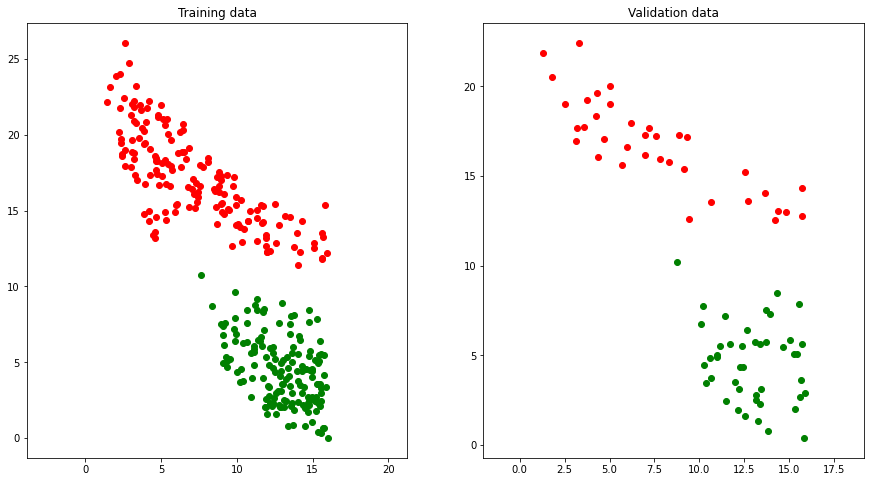

In [4]:
# Code to transform training and validation data and plot them goes here

X1 = X[:,0].reshape(-1,1)
X2 = (X[:,1] + 0.1 * (X[:,0]-16)**2).reshape(-1,1)
X_new=np.concatenate((X1,X2), 1)

XX_train,XX_val,y_train,y_val=train_val_split(X_new,y,0.2)
    
plt.rcParams["figure.figsize"] = (15, 8)
plt.subplot(1,2, 1)
plot_data(XX_train, y_train, 'Training data')
plt.subplot(1,2, 2)
plot_data(XX_val, y_val, 'Validation data')


## Question 4

Use the simple QP solution to the SVM margin maximization problem from class to find $\mathbf{w}$, $b$ that best separate
the two classes.

In [5]:
# Code for simple QP SVM here



import cvxopt

m = XX_train.shape[0]
n = 2

# QP problem: set Q, c, A, b

# Parameters are w, b.

c = np.zeros((n+1, 1))
Q = np.eye(n+1)
Q[n,n] = 0
b = -np.ones((m, 1))
A = - np.concatenate((XX_train, np.ones((m, 1))), 1) * y_train

def cvxopt_solve_qp(Q, c, A=None, b=None, E=None, d=None):
    Q = .5 * (Q + Q.T)  # make sure Q is symmetric
    args = [cvxopt.matrix(Q), cvxopt.matrix(c)]
    if A is not None:
        args.extend([cvxopt.matrix(A), cvxopt.matrix(b)])
        if E is not None:
            args.extend([cvxopt.matrix(E), cvxopt.matrix(d)])
    sol = cvxopt.solvers.qp(*args)
    if 'optimal' not in sol['status']:
        return None
    return np.array(sol['x']).reshape((Q.shape[1],))

opt_params = cvxopt_solve_qp(Q, c, A, b)
w = opt_params[0:2]
b = opt_params[2]
print('w = ',w)
print('b = ',b)

     pcost       dcost       gap    pres   dres
 0:  1.4844e-02  1.3620e+02  1e+03  2e+00  5e+03
 1:  8.2925e-02 -2.4578e+02  5e+02  8e-01  2e+03
 2:  1.1026e-01 -2.3789e+02  5e+02  7e-01  2e+03
 3:  1.7954e-01 -2.1676e+02  5e+02  6e-01  1e+03
 4:  4.9582e-01 -2.2837e+02  3e+02  3e-01  6e+02
 5:  7.5289e-01 -2.4153e+01  3e+01  2e-02  4e+01
 6:  7.3288e-01  3.3002e-01  4e-01  2e-15  5e-14
 7:  5.9556e-01  5.7966e-01  2e-02  2e-15  2e-14
 8:  5.9397e-01  5.9381e-01  2e-04  2e-15  4e-14
 9:  5.9395e-01  5.9395e-01  2e-06  2e-15  1e-14
10:  5.9395e-01  5.9395e-01  2e-08  2e-15  4e-14
Optimal solution found.
w =  [-0.20661662 -1.07014746]
b =  14.098340270998863


## Question 5

Write a function `svm_predict` that takes as input $\mathbf{w}$ and $b$ and a sample $\mathbf{x}$ and returns the
predicted class
(-1 or +1) of $\mathbf{x}$. Use this function to calculate training and test accuracy of your model.

In [23]:
def svm_predict(w, b, x):
    return np.where(x @ np.array(w) + b < 0, -1, 1).reshape(-1, 1)
m_train = XX_train.shape[0]
print('Training set accuracy:', (svm_predict(w, b, XX_train) == y_train).sum() / m_train)
m_val = XX_val.shape[0]
print('Validation set accuracy:', (svm_predict(w, b, XX_val) == y_val).sum() / m_val)

Training set accuracy: 1.0
Validation set accuracy: 1.0


In [24]:
XX_train.shape, w.shape
(np.where(XX_train@w+b<0,-1,1)==y_train).sum()
(np.where(XX_train@np.array(w)<0,-1,1).reshape(-1,1)==y_train).sum() / m_train

0.5125